# Create a discrete Markov chain process

This example details first how to create and manipulate a discrete Markov chain.

A discrete Markov chain $X: \Omega \times \mathcal{D} \rightarrow E$, where $E = [\![ 0,...,p-1]\!]$ is a process
where $\mathcal{D}=\mathbb{R}$ discretized on the time grid $(t_k)_{k \geq 0}$ such
that:

$$\begin{aligned}
      \forall k > 0,\: \mathbb{P} ( X_{t_k} \> | \> X_{t_0},...X_{t_{k-1}} )  =  \mathbb{P} ( X_{t_k} \> | \> X_{t_{k-1}} )
  \end{aligned}
$$

The transition matrix of the process $\mathcal{M} = (m_{i,j})$ can be defined such that:

$$\begin{aligned}
     \forall t_k \in \mathcal{D}, \forall i,j < p , \> m_{i+1,j+1} = \mathbb{P} (X_{t_{k+1}} = j \> | \> X_{t_{k}} = i)
  \end{aligned}$$

The library proposes to model it through the object *DiscreteMarkovChain* defined thanks to the origin $X_{t_0}$ (which can be either deterministic or uncertain), the transition matrix $\mathcal{M}$ and the time grid.

In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# Define the origin
origin = ot.Dirac(0.0)

In [3]:
# Define the transition matrix
transition = ot.SquareMatrix([[0.1, 0.3, 0.6], [0.7, 0.1, 0.2], [0.5, 0.3, 0.2]])

In [4]:
# Define an 1-d mesh
tgrid = ot.RegularGrid(0.0, 1.0, 50)

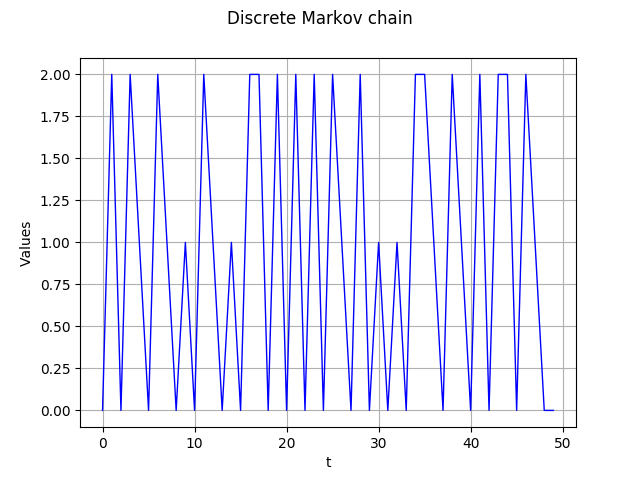

In [5]:
# Markov chain definition and realization
process = ot.DiscreteMarkovChain(origin, transition, tgrid)
real = process.getRealization()
graph = real.drawMarginal(0)
graph.setTitle('Discrete Markov chain')
graph

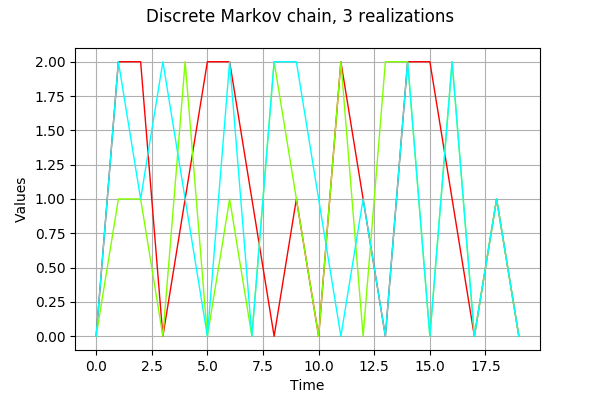

In [6]:
# Get several realizations
process.setTimeGrid(ot.RegularGrid(0.0,1.0,20))
reals = process.getSample(3)
graph = reals.drawMarginal(0)
graph.setTitle('Discrete Markov chain, 3 realizations')
graph

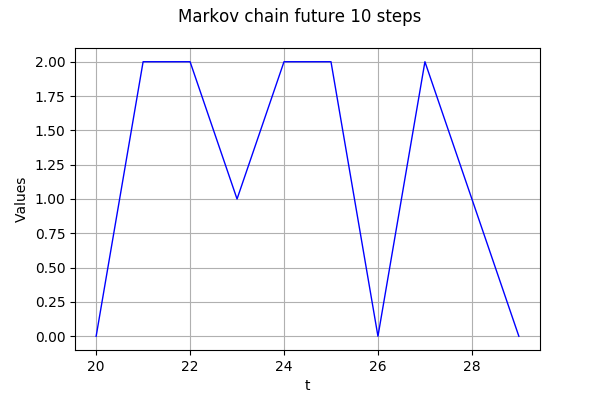

In [7]:
# Markov chain future 10 steps
future = process.getFuture(10)
graph = future.drawMarginal(0)
graph.setTitle('Markov chain future 10 steps')
graph

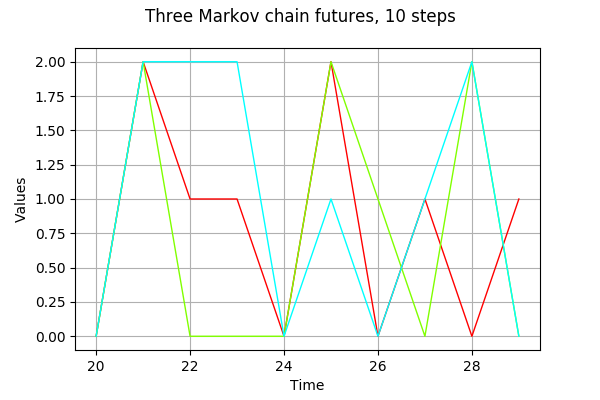

In [8]:
# Markov chain 3 different futures
futures = process.getFuture(10,3)
graph = futures.drawMarginal(0)
graph.setTitle('Three Markov chain futures, 10 steps')
graph